In [ ]:
!pip install --upgrade google-cloud-texttospeech

In [1]:
from dotenv import load_dotenv

# .env 파일에서 환경변수 로드
load_dotenv()

True

## 구글 딥리서치의 결과를 바탕으로 가상 회의록을 생성해보자. 

가상 회의록을 생성하는 순서는 다음과 같다.
STEP 1. 참조 파일을 바탕으로 1~4차 회의록 내용을 생성.
STEP 2. gemini-2.5-pro tts용 contents 스타일로 변환
STEP 3. 회의록 각 차수에 맞게 나눈다.
STEP 4. 각 차수별 오디오 파일을 생성한다.

참조파일 : aiNote_report.txt

### STEP 1. 참조 파일을 바탕으로 1~4차 회의록 내용을 생성.

In [1]:
from google import genai
from google.genai import types

# 여기에 자신의 API 키를 설정하거나 gcloud auth application-default login 명령으로 인증하세요.
client = genai.Client()

# 텍스트 파일을 불러올 로컬 PC의 전체 경로를 지정합니다.
file_path = "./data/aiNote_report.txt"

# 파일을 바이너리(binary) 읽기 모드('rb')로 엽니다.
with open(file_path, "rb") as f:
    file_bytes = f.read()

# 사용할 모델을 설정합니다.
model_name = "gemini-2.5-pro"

prompt = """가상의 회의록을 만들려고 합니다. 
        주제는 AI 회의록 정리 및 요약, Q&A 서비스 입니다. 
        이에 대한 세부 내용은 다음과 같습니다. 
        이 내용을 바탕으로 4번에 걸친 가상 회의록을 만들려고 합니다. 
        가상 회의록에 참여자는 4명이고, 4번의 회의를 통해 기획이 정리되는 과정을 대화 형태로 만들어주면 돼.
        대화의 내용에 안부 인사나 날씨, 오늘 출근 하면서 있었던 일들, 중간에 휴대폰이 울려서 전화를 받고 
        바로 끊는 것과 같은 대한 잡담과 같은 내용도 추가해줘.
        """

# --- 주요 변경 사항 ---
# 'types.Part.from_data' 대신 'types.Part.from_bytes'를 사용합니다.
# Base64 인코딩 과정 없이 파일에서 읽은 바이트(file_bytes)를 직접 전달합니다.
response = client.models.generate_content(
    model=model_name,
    contents=[
        prompt,
        types.Part.from_bytes(
            data=file_bytes,  # 파일에서 읽은 원본 바이트 데이터를 사용합니다.
            mime_type="text/plain",
        ),
    ],
)

print(response.text)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


네, 알겠습니다. 제공해주신 상세한 기획안을 바탕으로, 4명의 참여자가 4번의 회의를 거쳐 'AI 회의록 정리 및 요약, Q&A 서비스' 기획을 발전시키는 과정을 가상 회의록 형태로 작성해 드리겠습니다. 잡담과 자연스러운 대화 흐름을 포함하여 생동감 있게 구성하겠습니다.

---

### 등장인물

*   **김민준 팀장 (PM):** 프로젝트를 총괄하는 프로덕트 매니저. 논리적이고 목표 지향적이다.
*   **이정훈 수석 (개발):** 기술적인 관점에서 실현 가능성과 구조를 검토하는 리드 개발자. 현실적이고 신중하다.
*   **박서연 디자이너 (UX/UI):** 사용자 경험과 디자인을 책임진다. 사용자 관점에서 문제를 제기하고 아이디어를 낸다.
*   **최지호 매니저 (사업/마케팅):** 시장 분석, 경쟁 환경, 수익 모델을 담당한다. 시장의 흐름과 비즈니스 기회에 민감하다.

---

### 1차 회의록: 프로젝트 킥오프 및 시장 분석

**회의명:** 신규 AI 회의 인텔리전스 플랫폼 킥오프 미팅
**일시:** 2023년 10월 23일 (월) 10:00 AM
**장소:** 본사 1회의실
**참석자:** 김민준 팀장, 이정훈 수석, 박서연 디자이너, 최지호 매니저

**(회의 시작)**

**김민준 팀장:** 다들 좋은 아침입니다. 주말은 잘 보내셨어요? 오늘 아침에 비가 와서 그런지 차가 엄청 막히더라고요. 지각할 뻔했습니다.

**최지호 매니저:** 저도요. 버스에 사람이 어찌나 많던지. 그래도 커피 한 잔 하니 정신이 좀 드네요.

**박서연 디자이너:** 전 다행히 지하철 타고 와서 괜찮았어요. 자, 다들 커피도 있으니 시작해볼까요?

**김민준 팀장:** 네, 좋습니다. 오늘부터 우리가 함께 만들어갈 신규 프로젝트, 가칭 'AI 회의 인텔리전스 플랫폼'에 대한 킥오프 미팅을 시작하겠습니다. 제가 공유 드린 전략 분석 보고서는 다들 읽어보셨죠?

**이정훈 수석:** 네, 어제 밤에 정독했습니다. 분량이 꽤 되던데요. (웃음) 시장 분석이 아주 

In [2]:
with open("./data/meetingNote.txt", "w", encoding="utf-8") as f:
    # response.text의 내용을 파일에 씁니다.
    f.write(response.text)

print("\n회의록이 meetingNote.txt 파일로 저장되었습니다. 🎉")


회의록이 meetingNote.txt 파일로 저장되었습니다. 🎉


## STEP 2. gemini-2.5-pro tts용 contents 스타일로 변환

In [1]:
from google import genai
from google.genai import types

# 여기에 자신의 API 키를 설정하거나 gcloud auth application-default login 명령으로 인증하세요.
client = genai.Client()

# 텍스트 파일을 불러올 로컬 PC의 전체 경로를 지정합니다.
file_path = "./data/meetingNote.txt"

# 파일을 바이너리(binary) 읽기 모드('rb')로 엽니다.
with open(file_path, "rb") as f:
    file_bytes = f.read()

# 사용할 모델을 설정합니다.
model_name = "gemini-2.5-pro"

prompt = """
        1차,2차,3차,4차 회의록의 대화 내용을 그대로 수정 없이 나눠서 
        다음 양식을 참조하여 gemini-2.5-pro tts용 contents 스타일로 변환해줘.
        각 차수 회의록의 시작은 "[회의록 HEADER]"이라는 문자열로 시작하게 추가해줘.
        대화자명도 Speaker 1, Speaker 2형태로 변경해줘. speaker의 순서는 각 차수 회의록 안에서
        처음으로 등장하는 순서대로 1번부터 순번을 할당해줘. 출력되는 포맷은 문자열이야.
        대화 내용을 살펴보고, 대화 내용을 보조하는 내용은 맥락에 따라 대화 내용으로 변경하던지, 삭제해줘.
     
        [예시]
  
        Speaker 1: 안녕
        
        Speaker 2: 안녕하세요.    

        """

# --- 주요 변경 사항 ---
# 'types.Part.from_data' 대신 'types.Part.from_bytes'를 사용합니다.
# Base64 인코딩 과정 없이 파일에서 읽은 바이트(file_bytes)를 직접 전달합니다.
response = client.models.generate_content(
    model=model_name,
    contents=[
        prompt,
        types.Part.from_bytes(
            data=file_bytes,  # 파일에서 읽은 원본 바이트 데이터를 사용합니다.
            mime_type="text/plain",
        ),
    ],
)

print(response.text)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


[회의록 HEADER]
Speaker 1: 다들 좋은 아침입니다. 주말은 잘 보내셨어요? 오늘 아침에 비가 와서 그런지 차가 엄청 막히더라고요. 지각할 뻔했습니다.
Speaker 2: 저도요. 버스에 사람이 어찌나 많던지. 그래도 커피 한 잔 하니 정신이 좀 드네요.
Speaker 3: 전 다행히 지하철 타고 와서 괜찮았어요. 자, 다들 커피도 있으니 시작해볼까요?
Speaker 1: 네, 좋습니다. 오늘부터 우리가 함께 만들어갈 신규 프로젝트, 가칭 'AI 회의 인텔리전스 플랫폼'에 대한 킥오프 미팅을 시작하겠습니다. 제가 공유 드린 전략 분석 보고서는 다들 읽어보셨죠?
Speaker 4: 네, 어제 밤에 정독했습니다. 분량이 꽤 되던데요. 시장 분석이 아주 상세해서 놀랐습니다.
Speaker 1: 그렇죠? 보고서의 핵심 논지, '단순 녹취를 넘어 인텔리전스로의 진화'라는 말이 딱 와닿았어요. 이제 STT 정확도만으로는 승부할 수 없는 시장이 된 거죠. 우리의 목표는 단순한 받아쓰기 셔틀이 아니라, 회의에서 '통찰력'을 뽑아주는 진정한 '인텔리전스' 플랫폼을 만드는 겁니다.
Speaker 2: 맞습니다. 특히 국내 시장 분석 파트가 인상 깊었어요. 네이버 '클로바노트'가 '한국어라는 해자(moat)'를 아주 깊게 파놓은 상황에서, 우리가 단순히 '한국어 인식이 더 정확해요'라고 외치는 건 자살행위나 다름없죠.
Speaker 3: 저도 그 부분에 공감해요. 클로바노트를 쓰는 친구들 보면 정확도 자체에는 이미 만족하고 있더라고요. 오히려 UI가 좀 더 편했으면 좋겠다거나, 회의 끝나고 바로 할 일을 정리해줬으면 좋겠다는 식의 '워크플로우'에 대한 불만이 많았어요. 보고서에서 말하는 '인텔리전스 및 워크플로우 계층'을 우리가 어떻게 설계하느냐가 관건이겠네요.
Speaker 4: 기술적인 관점에서도 시사하는 바가 큽니다. OpenAI의 Whisper 같은 좋은 오픈소스 모델도 있고, 클라우드 업체들 API 성능도 상향 평준화됐죠. 굳이 우리가 STT 엔진 자체를 밑

## STEP 3. 회의록 각 차수에 맞게 나눈다.

In [2]:
# "### **"를 기준으로 텍스트를 나눕니다.
# 첫 번째 요소는 서론이므로, 인덱스 1부터 사용합니다.
split_meetings = response.text.split("[회의록 HEADER]")[1:]

# 각 변수에 회의록 내용을 할당합니다.
meeting_1 = (
    split_meetings[0] if len(split_meetings) > 0 else "1차 회의록을 찾을 수 없습니다."
)
meeting_2 = (
    split_meetings[1] if len(split_meetings) > 1 else "2차 회의록을 찾을 수 없습니다."
)
meeting_3 = (
    split_meetings[2] if len(split_meetings) > 2 else "3차 회의록을 찾을 수 없습니다."
)
meeting_4 = (
    split_meetings[3] if len(split_meetings) > 3 else "4차 회의록을 찾을 수 없습니다."
)

In [32]:
print(meeting_1)


Speaker 1: 다들 좋은 아침입니다. 주말은 잘 보내셨어요? 오늘 아침에 비가 와서 그런지 차가 엄청 막히더라고요. 지각할 뻔했습니다.
Speaker 2: 저도요. 버스에 사람이 어찌나 많던지. 그래도 커피 한 잔 하니 정신이 좀 드네요.
Speaker 3: 전 다행히 지하철 타고 와서 괜찮았어요. 자, 다들 커피도 있으니 시작해볼까요?
Speaker 1: 네, 좋습니다. 오늘부터 우리가 함께 만들어갈 신규 프로젝트, 가칭 'AI 회의 인텔리전스 플랫폼'에 대한 킥오프 미팅을 시작하겠습니다. 제가 공유 드린 전략 분석 보고서는 다들 읽어보셨죠?
Speaker 4: 네, 어제 밤에 정독했습니다. 분량이 꽤 되던데요. 시장 분석이 아주 상세해서 놀랐습니다.
Speaker 1: 그렇죠? 보고서의 핵심 논지, '단순 녹취를 넘어 인텔리전스로의 진화'라는 말이 딱 와닿았어요. 이제 STT 정확도만으로는 승부할 수 없는 시장이 된 거죠. 우리의 목표는 단순한 받아쓰기 셔틀이 아니라, 회의에서 '통찰력'을 뽑아주는 진정한 '인텔리전스' 플랫폼을 만드는 겁니다.
Speaker 2: 맞습니다. 특히 국내 시장 분석 파트가 인상 깊었어요. 네이버 '클로바노트'가 '한국어라는 해자(moat)'를 아주 깊게 파놓은 상황에서, 우리가 단순히 '한국어 인식이 더 정확해요'라고 외치는 건 자살행위나 다름없죠.
Speaker 3: 저도 그 부분에 공감해요. 클로바노트를 쓰는 친구들 보면 정확도 자체에는 이미 만족하고 있더라고요. 오히려 UI가 좀 더 편했으면 좋겠다거나, 회의 끝나고 바로 할 일을 정리해줬으면 좋겠다는 식의 '워크플로우'에 대한 불만이 많았어요. 보고서에서 말하는 '인텔리전스 및 워크플로우 계층'을 우리가 어떻게 설계하느냐가 관건이겠네요.
Speaker 4: 기술적인 관점에서도 시사하는 바가 큽니다. OpenAI의 Whisper 같은 좋은 오픈소스 모델도 있고, 클라우드 업체들 API 성능도 상향 평준화됐죠. 굳이 우리가 STT 엔진 자체를 밑바닥부터 개발하느라 리

### 차수로 나누어진 회의록 csv로 저장

In [ ]:
import pandas as pd
import io
import os


# ---------------------------------------------------------------------------------
# 1. 통합 CSV 저장 함수 (텍스트 내용과 출력 파일명만 인수로 받음)
def save_to_csv(text_content, filename):

    parsed_data = []

    # 1. 텍스트 파싱 로직
    # 문자열을 파일 객체처럼 처리하여 줄 단위로 읽습니다.
    file_like_object = io.StringIO(text_content)

    for line in file_like_object:
        # 양 끝의 공백 및 개행 문자를 제거합니다.
        clean_line = line.strip()

        # 빈 줄은 건너뜀
        if not clean_line:
            continue

        # 첫 번째 ': '를 기준으로 발화자(Speaker)와 스크립트(Transcript)를 분리합니다.
        # split(': ', 1)을 사용하여 스크립트 내용에 ':'가 있어도 문제가 되지 않도록 합니다.
        parts = clean_line.split(": ", 1)

        if len(parts) == 2:
            speaker = parts[0].strip()
            transcript = parts[1].strip()

            # 파싱된 데이터를 딕셔너리 형태로 리스트에 추가
            parsed_data.append({"org_speaker": speaker, "org_transcript": transcript})
        # 형식에 맞지 않는 줄은 경고 없이 건너킵니다.

    # 파싱된 데이터를 사용하여 DataFrame 생성
    df = pd.DataFrame(parsed_data)

    # CSV 파일로 저장
    # index=False: DataFrame의 인덱스를 CSV에 포함하지 않음
    # encoding='utf-8-sig': 한글 깨짐 방지 및 엑셀 호환성을 위한 인코딩 설정
    df.to_csv(filename, index=False, encoding="utf-8-sig")
    print(f"\n--- CSV 파일 생성 성공 ---")

In [71]:
# CSV 파일명 설정
output_csv_filename = "meeting1.csv"

# 통합 함수 호출 (텍스트 내용 직접 전달)
save_to_csv(meeting_1, output_csv_filename)


--- CSV 파일 생성 성공 ---


## STEP 4. 각 차수별 오디오 파일을 생성한다. (OPENAI TTS사용)

In [ ]:
import os
import re
from openai import OpenAI
from pydub import AudioSegment
import io
from dotenv import load_dotenv

# .env 파일에서 환경변수 로드
load_dotenv()

# 모델 설정
set_model = "tts-1-hd"  # 또는 "tts-1" (더 빠르지만 품질이 낮음)

# OpenAI TTS 음성 옵션: alloy, echo, fable, onyx, nova, shimmer
set_speaker_voices = {
    "Speaker 1": "alloy",  # 중성적인 음성
    "Speaker 2": "echo",  # 남성적인 음성
    "Speaker 3": "fable",  # 영국식 억양
    "Speaker 4": "onyx",  # 깊은 남성 음성
}


def save_binary_file(file_name, data):
    """Saves binary data to a file."""
    with open(file_name, "wb") as f:
        f.write(data)
    print(f"✅ File saved successfully to: {file_name}")


def generate(conversation: str, saveFile: str):
    """
    Generates single-speaker audio for each line of dialogue and combines them
    into a single WAV file using OpenAI TTS API.
    """
    # OpenAI 클라이언트 생성
    client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

    # TTS 모델 설정
    model = set_model

    # 음성 4개 설정
    speaker_voices = set_speaker_voices

    # 대화 내용 파싱
    dialogue_blocks = conversation.strip().split("\n")
    dialogue_parts = []
    for block in dialogue_blocks:
        if block.strip():
            match = re.match(r"(Speaker \d+): (.*)", block, re.DOTALL)
            if match:
                speaker = match.group(1)
                dialogue = match.group(2)
                dialogue_parts.append({"speaker": speaker, "dialogue": dialogue})

    # 각 파트별 audio 대화를 생성
    all_audio_segments = []

    for part in dialogue_parts:
        speaker = part["speaker"]
        dialogue = part["dialogue"]
        voice_name = speaker_voices.get(speaker, "alloy")

        print(f"Generating audio for {speaker} with voice '{voice_name}'...")
        # print(dialogue)

        try:
            # OpenAI TTS API 호출
            response = client.audio.speech.create(
                model=model,
                voice=voice_name,
                input=dialogue,
                response_format="wav",  # WAV 형식으로 직접 생성
            )

            # 응답을 바이트로 읽기
            audio_data = response.content

            # pydub AudioSegment로 변환
            audio_segment = AudioSegment.from_file(io.BytesIO(audio_data), format="wav")
            all_audio_segments.append(audio_segment)
            print(" -> Success.")

        except Exception as e:
            print(f" -> Failed to generate audio for '{dialogue[:30]}...': {e}")

    # 모든 오디오 세그먼트 결합
    if all_audio_segments:
        print("\nCombining all audio parts...")
        combined_audio = all_audio_segments[0]
        for segment in all_audio_segments[1:]:
            combined_audio += segment

        # WAV 파일로 저장
        combined_audio.export(saveFile, format="wav")
        print(f"✅ Combined audio saved to: {saveFile}")
    else:
        print("No audio data was generated.")


def convert_pcm_to_wav(
    pcm_data: bytes,
    sample_rate: int = 24000,
    bits_per_sample: int = 16,
    num_channels: int = 1,
) -> bytes:
    """Converts raw PCM data to WAV format."""
    data_size = len(pcm_data)
    bytes_per_sample = bits_per_sample // 8
    block_align = num_channels * bytes_per_sample
    byte_rate = sample_rate * block_align
    chunk_size = 36 + data_size

    header = struct.pack(
        "<4sI4s4sIHHIIHH4sI",
        b"RIFF",
        chunk_size,
        b"WAVE",
        b"fmt ",
        16,  # fmt chunk size
        1,  # audio format (PCM)
        num_channels,
        sample_rate,
        byte_rate,
        block_align,
        bits_per_sample,
        b"data",
        data_size,
    )
    return header + pcm_data

In [115]:
WAV_FILE_NAME = "metting2.wav"  # 예: "C:/Users/MyUser/Documents/report.pdf"

# 방법 1: pydub 사용 (권장)
generate(meeting_2, WAV_FILE_NAME)

Generating audio for Speaker 1 with voice 'alloy'...
 -> Success.
Generating audio for Speaker 2 with voice 'echo'...
 -> Success.
Generating audio for Speaker 3 with voice 'fable'...
 -> Success.
Generating audio for Speaker 2 with voice 'echo'...
 -> Success.
Generating audio for Speaker 1 with voice 'alloy'...
 -> Success.
Generating audio for Speaker 4 with voice 'onyx'...
 -> Success.
Generating audio for Speaker 4 with voice 'onyx'...
 -> Success.
Generating audio for Speaker 2 with voice 'echo'...
 -> Success.
Generating audio for Speaker 3 with voice 'fable'...
 -> Success.
Generating audio for Speaker 1 with voice 'alloy'...
 -> Success.
Generating audio for Speaker 2 with voice 'echo'...
 -> Success.

Combining all audio parts...
✅ Combined audio saved to: metting2.wav


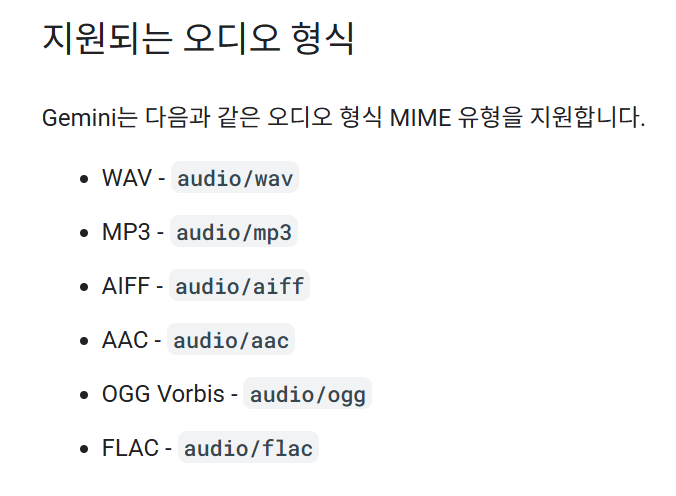

In [ ]:
# 필요한 라이브러리 설치
# pip install google-genai

from google import genai
from google.genai import types
import os


def transcribe_diarize_gemini(local_audio_path: str, api_key: str = None) -> str:
    """
    Gemini 2.5 Pro 모델 (google-genai)을 사용하여 로컬 오디오 파일을 변환하고 화자를 분리합니다.

    Args:
        local_audio_path: 로컬 오디오 파일 경로 (예: "meeting2.wav")
        api_key: Google API 키 (선택, None이면 환경변수나 gcloud auth 사용)

    Returns:
        화자 분리된 JSON 문자열
    """
    # Client 생성 (API 키가 있으면 사용, 없으면 기본 인증)
    if api_key:
        client = genai.Client(api_key=api_key)
    else:
        # 환경변수 GOOGLE_API_KEY 또는 gcloud auth 사용
        client = genai.Client()

    print(f"📤 '{local_audio_path}' 파일을 업로드 중입니다...")

    # 로컬 파일을 바이너리로 읽기
    with open(local_audio_path, "rb") as f:
        file_bytes = f.read()

    # 파일 확장자에 따른 MIME 타입 결정
    file_ext = os.path.splitext(local_audio_path)[1].lower()
    mime_type_map = {
        ".wav": "audio/wav",
        ".mp3": "audio/mp3",
        ".m4a": "audio/mp4",
        ".flac": "audio/flac",
        ".ogg": "audio/ogg",
    }
    mime_type = mime_type_map.get(file_ext, "audio/wav")

    print(f"✅ 파일 업로드 완료 (타입: {mime_type})")

    prompt = """
    당신은 전문적인 회의록 작성자입니다. 제공된 오디오 파일을 듣고 다음 작업을 수행해 주십시오:
    1. 전체 대화를 정확하게 텍스트로 변환합니다.
    2. 각 발화에 대해 화자를 숫자로 구분합니다. 발화자의 등장 순서대로 번호를 할당합니다. 참고로, 현재 오디오의 화자수는 총 4명입니다. 화자의 숫자는 4를 넘지 않습니다.
    3. 최종 결과는 아래의 JSON 형식과 정확히 일치해야 합니다. 각 JSON 객체는 'speaker', 'start_time_seconds', 'transcript' 키를 포함해야 합니다.
    4. speaker가 동일한 경우 하나의 행으로 만듭니다. 하나의 행으로 만드는 경우 'start_time_seconds' 값은 제일 앞의 행의 시간을 사용합니다.
    """

    # 모델에 멀티모달 프롬프트 전송
    print("🤖 Gemini 2.5 Pro로 음성 인식 중...")

    response = client.models.generate_content(
        model="gemini-2.5-pro",
        contents=[
            prompt,
            types.Part.from_bytes(
                data=file_bytes,
                mime_type=mime_type,
            ),
        ],
    )

    print("✅ 음성 인식 완료")

    # 결과 출력
    # Gemini 응답은 Markdown 코드 블록을 포함할 수 있으므로, 이를 정리합니다.
    cleaned_response = response.text.strip().replace("```json", "").replace("```", "")
    # print(cleaned_response)

    return cleaned_response

In [ ]:
response = transcribe_diarize_gemini(WAV_FILE_NAME)

In [141]:
import json
import pandas as pd
import os
from typing import Optional, Dict, Any, List


def csv_append(response_json: str, csv_filename: str) -> Optional[pd.DataFrame]:

    dataList: List[Dict[str, Any]] = json.loads(response_json)
    df_json = pd.DataFrame(dataList)

    # 'start_time_seconds' 컬럼 이름을 'start_time'으로 변경
    df_json.rename(columns={"start_time_seconds": "start_time"}, inplace=True)

    # 새로 추가할 컬럼만 선택
    df_new_columns = df_json[["speaker", "start_time", "transcript"]]

    # --- 2. 기존 CSV 파일 불러오기 ---
    if not os.path.exists(csv_filename):
        print(
            f"[오류] '{csv_filename}' 파일이 존재하지 않습니다. 기존 파일을 확인해 주세요."
        )
        return None

    df_existing = pd.read_csv(csv_filename)

    # --- 4. 컬럼 추가 및 저장 ---
    # 기존 데이터프레임에 새로 생성한 컬럼을 병합 (axis=1은 가로 방향 병합)
    # index가 동일하다고 가정합니다.
    df_updated = pd.concat([df_existing, df_new_columns], axis=1, join="outer")

    # 수정된 DataFrame을 CSV 파일로 저장 (기존 파일 덮어쓰기)
    df_updated.to_csv(csv_filename, index=False, encoding="utf-8-sig")

    print(
        f"\n성공적으로 '{csv_filename}' 파일에 'start_time' 컬럼이 추가되고 저장되었습니다."
    )
    return df_updated

### TTS에 사용한 대화 스크립트를 먼저 CSV에 저장 

In [147]:
# CSV 파일명 설정
csv_filename = "meeting2.csv"

# 통합 함수 호출 (텍스트 내용 직접 전달)
save_to_csv(meeting_2, csv_filename)


--- CSV 파일 생성 성공 ---


### STT에서 생성된 대화 스크립트를 CSV에 추가

In [ ]:
# csv_filename = "meeting1.csv"
updated_df = csv_append(response, csv_filename)


성공적으로 'meeting2.csv' 파일에 'start_time' 컬럼이 추가되고 저장되었습니다.


### 컬럼 내용 전처리 및 비교

In [ ]:
# 'org_speaker' 컬럼이 이미 DataFrame 'df_updated'에 존재한다고 가정합니다.
# 이 컬럼의 모든 값에서 "speaker" 문자열을 제거합니다.
updated_df["org_speaker"] = updated_df["org_speaker"].str.replace(
    "Speaker", "", regex=False
)
updated_df = updated_df.fillna("0")
updated_df["org_speaker"] = updated_df["org_speaker"].astype(int)
updated_df["speaker"] = updated_df["speaker"].astype(int)

updated_df.head(20)

,org_speaker,org_transcript,speaker,start_time,transcript
0,1,다들 들어오셨네요. 안녕하세요! 재택근무하니 출근 시간 아껴서 너무 좋아요.,1,0.0,다들 들어오셨네요. 안녕하세요. 재택근무 하니 출근시간 아껴서 너무 좋아요.
1,2,서연님 좋으시겠어요. 전 오늘 아이 유치원 데려다주고 오느라 정신이 하나도 없었네요...,2,3.0,서현님 좋으시겠어요. 전 오늘 아이 유치원 데려다주고 오느라 정신이 하나도 없었네요...
2,3,"네, 결론부터 말씀드리면 MVP 단계에서는 외부 API를 활용하는 게 압도적으로 유...",3,16.0,"네, 결론부터 말씀드리면 MVP 단계에서는 외부 API를 활용하는 게 압도적으로 유..."
3,2,명쾌하네요. 우리 핵심은 STT 자체가 아니라 인텔리전스 계층이니까요. 좋은 판단입...,2,39.0,명쾌하네요. 우리 핵심은 STT 자체가 아니라 인텔리전스 계층이니까요. 좋은 판단입...
4,1,"Fathom이랑 tl;dv를 직접 써봤는데, 정말 감탄했어요. 그냥 '회의 녹화 앱...",1,46.0,Fathom이랑 tldv를 직접 써 봤는데 정말 감탄했어요. 그냥 회의 녹화 앱이 ...
5,4,서연님 말씀에 전적으로 동감합니다. 제가 분석한 시장 포지셔닝 전략과도 일맥상통해요...,4,74.0,서현님 말씀에 전적으로 동감합니다. 제가 분석한 시장 포지셔닝 전략과도 일맥상통해요...
6,4,"어, 죄송합니다. 잠시만요. 네, 아니에요. 회의 중이라 나중에 연락드릴게요. .....",2,121.0,더 나은 프리미엄 파괴자라. 흥미로운 방향성이네요. 그럼 Fathom보다 더 나은 ...
7,2,'더 나은 프리미엄 파괴자'라... 흥미로운 방향성이네요. 그럼 Fathom보다 '...,3,128.0,보고서에 나온 대화형 AI 챗 기능이 강력한 무기가 될 수 있겠네요. '지난 분기에...
8,3,"보고서에 나온 '대화형 AI 챗' 기능이 강력한 무기가 될 수 있겠네요. ""지난 분...",1,141.0,좋아요. 사용자가 과거 회의록을 일일이 뒤지는 고통을 해결해 줄 수 있겠네요. UX...
9,1,좋아요! 사용자가 과거 회의록을 일일이 뒤지는 고통을 해결해줄 수 있겠네요. UX적...,2,147.0,아주 좋은 아이디어들이네요. 그럼 방향이 어느 정도 잡히는 것 같습니다. 우리의 전...


In [150]:
updated_df.to_csv(csv_filename, index=False, encoding="utf-8-sig")